# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city = 'Burundi'
unit = 'metric'
city_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=' + unit
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 30, 'lat': -3.5},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 15.04,
  'feels_like': 13.96,
  'temp_min': 15.04,
  'temp_max': 15.04,
  'pressure': 1017,
  'humidity': 52,
  'sea_level': 1017,
  'grnd_level': 832},
 'visibility': 10000,
 'wind': {'speed': 1.33, 'deg': 217, 'gust': 1.21},
 'clouds': {'all': 78},
 'dt': 1689805105,
 'sys': {'country': 'BI', 'sunrise': 1689826073, 'sunset': 1689869063},
 'timezone': 7200,
 'id': 433561,
 'name': 'Burundi',
 'cod': 200}

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=' + unit
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | solvesborg
City not found. Skipping...
Processing Record 2 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | kralendijk
Processing Record 6 of Set 1 | al khums
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | walvis bay
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | bogande
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | vallenar
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | thunder bay
Processing Record 17 of Set 1 | chonchi
Processing Record 18 of Set 1 | pionerskiy
Processing Record 19 of Set 1 | aktau
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | benjamin aceval

Processing Record 39 of Set 4 | kapuskasing
Processing Record 40 of Set 4 | katsuura
Processing Record 41 of Set 4 | palmer
Processing Record 42 of Set 4 | naze
Processing Record 43 of Set 4 | bubaque
Processing Record 44 of Set 4 | zambezi
Processing Record 45 of Set 4 | bardai
Processing Record 46 of Set 4 | lihue
Processing Record 47 of Set 4 | persembe
Processing Record 48 of Set 4 | malanje
Processing Record 49 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 0 of Set 5 | vadso
Processing Record 1 of Set 5 | howrah
Processing Record 2 of Set 5 | puerto san jose
Processing Record 3 of Set 5 | fort bragg
Processing Record 4 of Set 5 | susuman
Processing Record 5 of Set 5 | margate
Processing Record 6 of Set 5 | sao joao da barra
Processing Record 7 of Set 5 | island harbour
Processing Record 8 of Set 5 | hermanus
Processing Record 9 of Set 5 | mo i rana
Processing Record 10 of Set 5 | lodeynoye pole
Processing Record 11 of Set 5 | guerrero negro
Processing Record 

Processing Record 31 of Set 8 | ulsteinvik
Processing Record 32 of Set 8 | enewetak
Processing Record 33 of Set 8 | san antonio de pale
Processing Record 34 of Set 8 | san sebastian de la gomera
Processing Record 35 of Set 8 | yaransk
Processing Record 36 of Set 8 | zyryanskoye
Processing Record 37 of Set 8 | bojnurd
Processing Record 38 of Set 8 | itoman
Processing Record 39 of Set 8 | nguigmi
Processing Record 40 of Set 8 | sinjai
Processing Record 41 of Set 8 | thames
Processing Record 42 of Set 8 | meadow lakes
Processing Record 43 of Set 8 | kawthoung
City not found. Skipping...
Processing Record 44 of Set 8 | greymouth
Processing Record 45 of Set 8 | huarmey
Processing Record 46 of Set 8 | calvi
Processing Record 47 of Set 8 | fish town
Processing Record 48 of Set 8 | aitape
Processing Record 49 of Set 8 | zvenigovo
Processing Record 0 of Set 9 | zaozersk
Processing Record 1 of Set 9 | tongouson
Processing Record 2 of Set 9 | la mana
Processing Record 3 of Set 9 | qobustan
Proces

Processing Record 21 of Set 12 | saint-felicien
Processing Record 22 of Set 12 | aljezur
Processing Record 23 of Set 12 | brak
Processing Record 24 of Set 12 | lampasas
Processing Record 25 of Set 12 | hasaki
Processing Record 26 of Set 12 | asuncion nochixtlan
Processing Record 27 of Set 12 | springbok
Processing Record 28 of Set 12 | ad dawadimi
Processing Record 29 of Set 12 | kikwit
Processing Record 30 of Set 12 | macau
Processing Record 31 of Set 12 | presidente medici
Processing Record 32 of Set 12 | uyuni
Processing Record 33 of Set 12 | fuerte olimpo
Processing Record 34 of Set 12 | axim
Processing Record 35 of Set 12 | kroya
Processing Record 36 of Set 12 | marovoay
Processing Record 37 of Set 12 | lahad datu
Processing Record 38 of Set 12 | esteli
Processing Record 39 of Set 12 | takayama
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.12,85,100,9.55,TF,1689805107
1,olonkinbyen,70.9221,-8.7187,4.90,91,81,4.35,SJ,1689805107
2,kralendijk,12.1500,-68.2667,27.51,86,7,10.23,BQ,1689805107
3,al khums,32.6486,14.2619,27.29,69,0,1.85,LY,1689805107
4,waitangi,-43.9535,-176.5597,13.23,91,84,1.79,NZ,1689805107


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.12,85,100,9.55,TF,1689805107
1,olonkinbyen,70.9221,-8.7187,4.90,91,81,4.35,SJ,1689805107
2,kralendijk,12.1500,-68.2667,27.51,86,7,10.23,BQ,1689805107
3,al khums,32.6486,14.2619,27.29,69,0,1.85,LY,1689805107
4,waitangi,-43.9535,-176.5597,13.23,91,84,1.79,NZ,1689805107


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

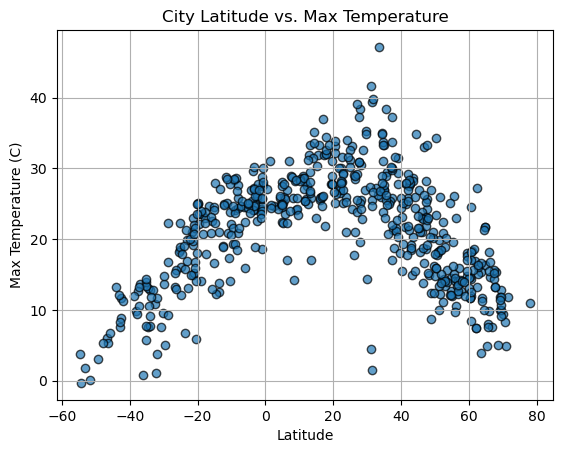

In [9]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
max_temp = city_data_df['Max Temp']

plt.scatter(lat, max_temp, c = 'tab:blue', alpha = 0.7, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

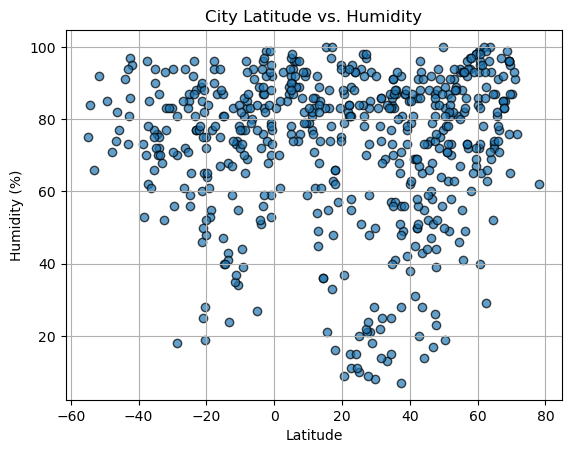

In [10]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

plt.scatter(lat, humidity, c = 'tab:blue', alpha = 0.7, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

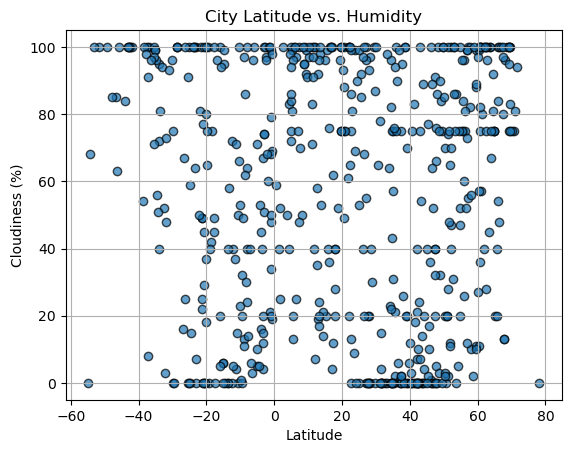

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']

plt.scatter(lat, cloudiness, c = 'tab:blue', alpha = 0.7, edgecolors = 'black')

# Incorporate the other graph Cloudiness
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

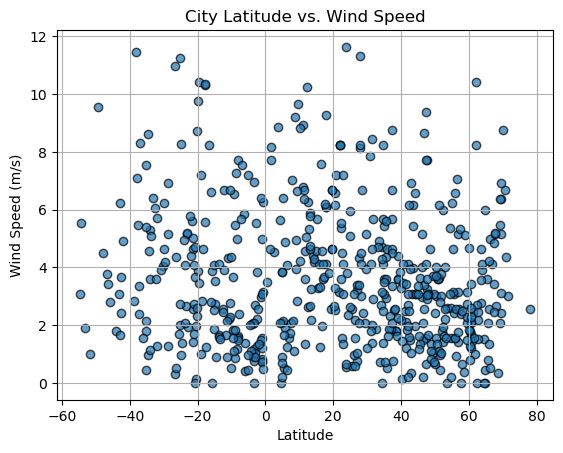

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']

plt.scatter(lat, wind_speed, c = 'tab:blue', alpha = 0.7, edgecolors = 'black')

# Incorporate the other graph Cloudiness
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_reg_plots(x, y):
    
    # perform linear regression on latitude and other metrics
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    # get regression values
    regress_vals = (x * slope) + intercept
    
    # create line equation string
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    
    # Create Plot
    plt.scatter(x, y)
    plt.ylabel(y.name)
    plt.xlabel(x.name)

    # Label plot and annotate the line equation
    plt.annotate(line_eq, xy = (5,10), fontsize = 10, color = 'red')

    # Print r value
    plt.plot(x, regress_vals, '-r')
    print(f'The r value is: {rvalue}.')
    
    # Show plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,4.90,91,81,4.35,SJ,1689805107
2,kralendijk,12.1500,-68.2667,27.51,86,7,10.23,BQ,1689805107
3,al khums,32.6486,14.2619,27.29,69,0,1.85,LY,1689805107
8,bogande,12.9714,-0.1436,31.92,49,92,5.33,BF,1689805108
10,stanley,54.8680,-1.6985,12.66,93,20,1.54,GB,1689804727


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.12,85,100,9.55,TF,1689805107
4,waitangi,-43.9535,-176.5597,13.23,91,84,1.79,NZ,1689805107
5,walvis bay,-22.9575,14.5053,13.09,77,0,1.95,NaN,1689805108
6,adamstown,-25.0660,-130.1015,22.34,85,100,11.25,PN,1689805108
7,bredasdorp,-34.5322,20.0403,7.64,76,56,0.96,ZA,1689805108


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.6620273142229028.


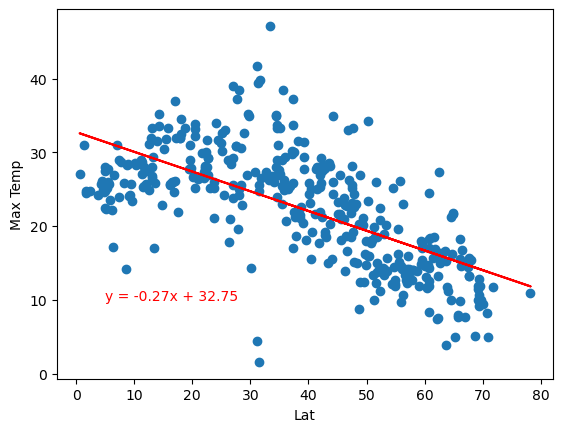

In [16]:
# Linear regression on Northern Hemisphere
lin_reg_plots(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

The r value is: 0.8438112005673897.


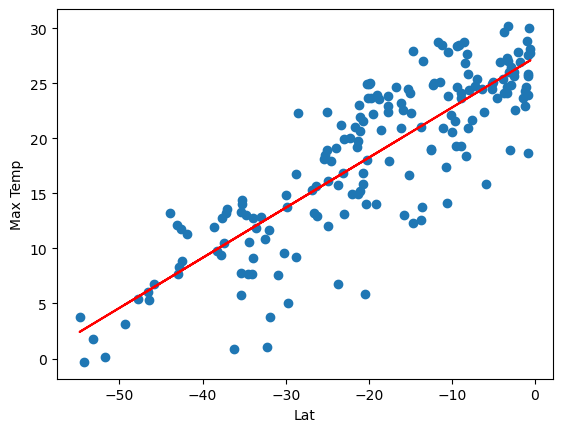

In [17]:
# Linear regression on Southern Hemisphere
lin_reg_plots(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** 
In the southern hemisphere, the temperature has a positive linear relationship between the temperature and latitude. As the latitude increases, the temperture also increases. The r value being 0.83 shows that there is a strong postive correlation between the temperature and latitude in the southern hemisphere. Because of this, you could be somewhat confident that you can predict the temperature in the southern hemisphere using the regression equation. 

In contrast, the northern hemisphere has shows a negative linear relationship between the temperature and latitude. As the latitude increases, the temperature decreases. The correlation value r for the northern hemisphere is about 0.66 which suggest a low positive correlation. There is less confidence that the regression equation could predicy the temperature given a particular latitude in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.08676251865342667.


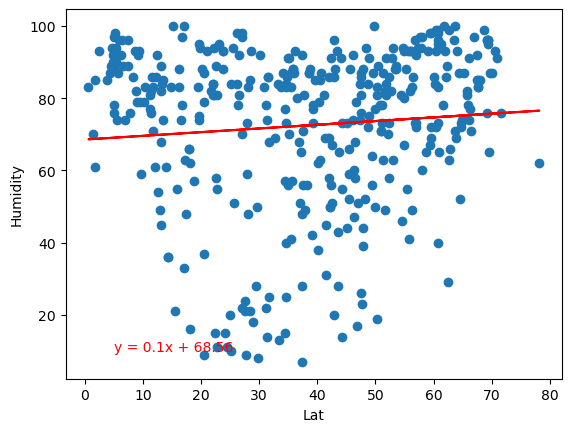

In [18]:
# Northern Hemisphere
lin_reg_plots(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

The r value is: -0.04707905853209708.


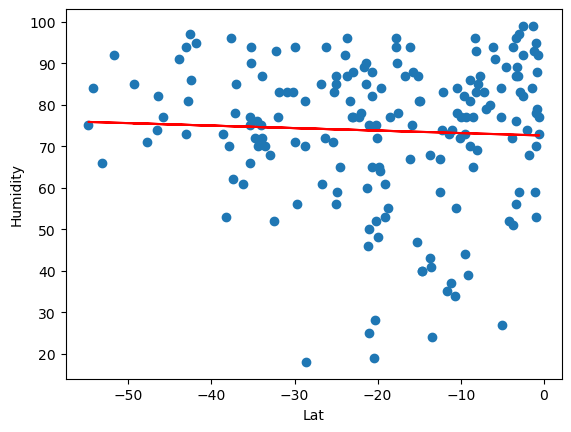

In [19]:
# Southern Hemisphere
lin_reg_plots(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** The results suggest that there is no strong correlation between the humidity and latitude. The regression equation would not be a good equation to use to predict the humidity of a region given the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.015719589403875335.


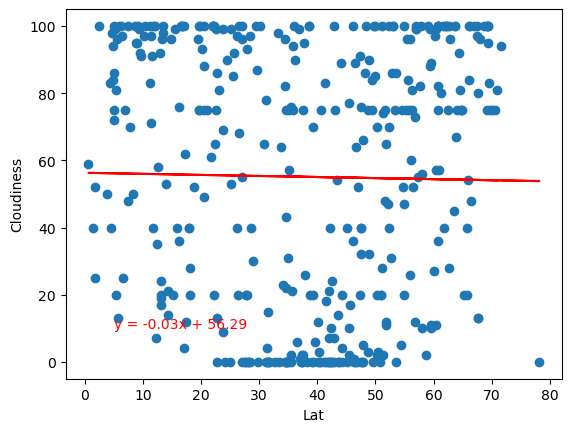

In [20]:
# Northern Hemisphere
lin_reg_plots(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r value is: -0.2963649719308676.


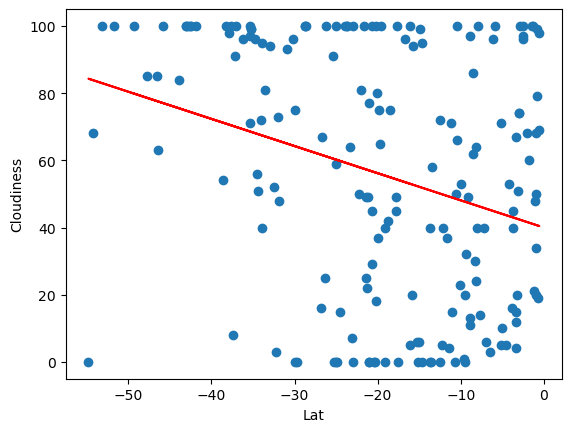

In [21]:
# Southern Hemisphere
lin_reg_plots(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** The results suggest that there is no strong correlation between the cloudiness and latitude. The regression equation would not be a good equation to use to predict the cloudiness of a region given the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.21726020598922083.


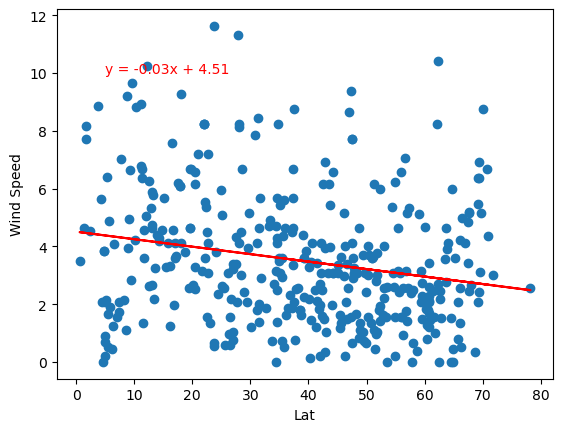

In [22]:
# Northern Hemisphere
lin_reg_plots(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r value is: -0.21700903676312233.


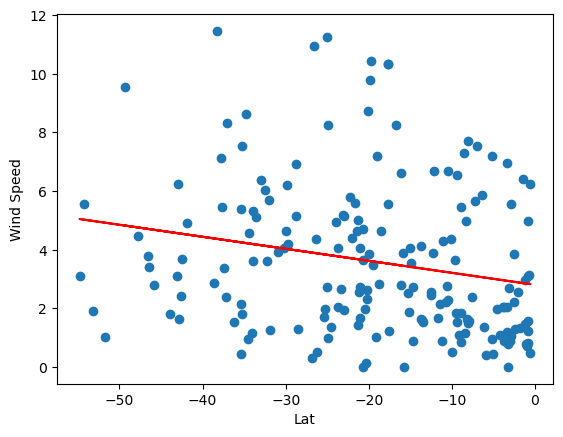

In [23]:
# Southern Hemisphere
lin_reg_plots(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** The results suggest that there is no strong correlation between the wind speed and latitude. The regression equation would not be a good equation to use to predict the wind speed of a region given the latitude.